# Task 1

In [1]:
%matplotlib inline
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np

Set up the data points:

In [2]:
xxT1 = [3, 5, 7, 9, 11]
yyT1 = [720, 410, 230, 190, 130]

Lagrange interpolating polynomial (using Sympy).

In [3]:
x = sym.symbols("x")
lagrange_poly = sym.polys.specialpolys.interpolating_poly(len(xxT1), x, xxT1, yyT1)
lagrange_poly

15*(x - 11)*(x - 9)*(x - 7)*(x - 5)/8 - 205*(x - 11)*(x - 9)*(x - 7)*(x - 3)/48 + 115*(x - 11)*(x - 9)*(x - 5)*(x - 3)/32 - 95*(x - 11)*(x - 7)*(x - 5)*(x - 3)/48 + 65*(x - 9)*(x - 7)*(x - 5)*(x - 3)/192

In [4]:
ptask1 = sym.simplify(lagrange_poly)
ptask1

-85*x**4/192 + 65*x**3/6 - 7495*x**2/96 + 355*x/6 + 63265/64

Plot of Lagrange polynomial.

# Task 2

In [5]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import linalg
from scipy import interpolate

Set up the data points.  This is the only thing that can be varied.

In [6]:
xxT2=np.array([2,4,8,12,20])
yyT2=np.array([560,420,235,125,70])

Get all the h values

In [10]:
n = len(xxT2)-1
xmin, xmax = xxT2[0], xxT2[n]
dx = np.zeros(n)
dx[0:n] = xxT2[1:n+1]-xxT2[0:n]
dx

array([2., 4., 4., 8.])

Set up the right hand side of the tridiagonal system:

In [11]:
B=np.zeros(n+1)

In [13]:
B[1:n]=(3.0/dx[1:n])*(yyT2[2:n+1]-yyT2[1:n])-(3/dx[0:n-1])*(yyT2[1:n]-yyT2[0:n-1])

In [14]:
B

array([ 0.   , 71.25 , 56.25 , 61.875,  0.   ])

Set up the tridiagonal matrix of the system

In [15]:
A = np.empty([n+1,n+1])
zeros = np.zeros(n+1)
line1 = np.zeros(n+1)
line1[0] = 1
linelast = np.zeros(n+1)
linelast[n] = 1
A[0], A[n] = line1, linelast
for aaa in range(n-1):
    A[aaa+1] = zeros
    Ainput = []
    Ainput = [dx[aaa], 2*(dx[aaa]+dx[aaa+1]), dx[aaa+1]]
    print(Ainput)
    A[aaa+1][aaa:aaa+3] = Ainput[0:3]
A

[2.0, 12.0, 4.0]
[4.0, 16.0, 4.0]
[4.0, 24.0, 8.0]


array([[ 1.,  0.,  0.,  0.,  0.],
       [ 2., 12.,  4.,  0.,  0.],
       [ 0.,  4., 16.,  4.,  0.],
       [ 0.,  0.,  4., 24.,  8.],
       [ 0.,  0.,  0.,  0.,  1.]])

Solve the linear system and insert the boundary conditions to obtain all the c coefficients in the cubic spline equations:

In [16]:
c=linalg.solve(A,B)
c

array([0.        , 5.40922619, 1.58482143, 2.3139881 , 0.        ])

Obtain the cubic spline coefficients b and d by solving equations (3.17) and (3.20) from the PDF:

In [17]:
b=[]
d=[]
b,d

([], [])

In [18]:
b[0:n] = (1/dx[0:n])*(yyT2[1:n+1]-yyT2[0:n])-(dx[0:n]/3)*(2*(c[0:n])+c[1:n+1])
b

[-73.6061507936508, -62.78769841269841, -34.81150793650794, -19.21626984126984]

In [19]:
d[0:n]=(1/(3*dx))*(c[1:n+1]-c[0:n])
d
#    Doesn't Change

[0.9015376984126983,
 -0.31870039682539675,
 0.06076388888888884,
 -0.09641617063492061]

Plot the spline equations:

In [20]:
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt


In [21]:
from sympy import Symbol
from sympy import integrate
from sympy import *
from scipy.integrate import quad
from fractions import Fraction

In [22]:
x = Symbol("x")
expr = sp.Eq(exp(-x**(2/5))* (x**(2/5) + 2)/x**(5/3), x)
expr

Eq(x**(-1.66666666666667)*(x**0.4 + 2)*exp(-x**0.4), x)

In [23]:
integrate(-x*exp(-x**(2/2)), x)

1.0*x**1.0*exp(-x**1.0) + 1.0*exp(-x**1.0)

In [24]:
integrate(exp(-x**(2/5))* (x**(2/5) + 2)/x**(5/3)), x

(-5.0*uppergamma(-1.66666666666667, x**0.4) - 2.5*uppergamma(-0.666666666666667, x**0.4),
 x)

In [25]:
import scipy.integrate
from numpy import exp
f= lambda x:exp(x**2)
i = scipy.integrate.quad(f, 0, 3)
print (i)

(1444.5451228927134, 7.114373390701587e-10)


In [26]:
from __future__ import print_function
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import math
from scipy import linalg
from scipy import interpolate

In [27]:
x = sp.Symbol("x")

AttributeError: 'function' object has no attribute 'quad'

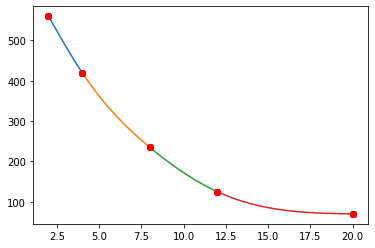

In [41]:
plt.scatter(xxT2, yyT2, marker="o", color="r")
for i in range(n):
     # lots of points for a smooth plot
    xx = np.linspace(xxT2[i], xxT2[i+1], 1000)

    p = d[i]*(xx-xxT2[i])**3 + c[i]*(xx-xxT2[i])**2 + b[i]*(xx-xxT2[i]) + yyT2[i]
    plt.plot(xx, p,label="B(a)")
    plt.plot(xxT2, yyT2, "ro")

xxx = np.linspace(xxT1[0], xxT1[-1], (xxT1[-1]-xxT1[0])*10)
xxT4 = np.linspace(2, 20, 180)
I = np.zeros(180)
for ii, item in enumerate(xxT4):
    fx =  lambda xT4: (np.exp(-xT4**(2/5))* (xT4**(2/5) + 2)/xT4**(5/3))
    int = integrate.quad(fx, 2, xxT4[ii])
    I[ii]=800-(600*int[0])

plt.plot(xxT4, I, "b", label="Bhat(a)")
plt.plot(xxT1, yyT1, "ks")
plt.plot(xxx, ptask1(xxx), "b--",label="C(a)")
plt.xlabel("Arsenic Standard (ppb)(a)")
plt.ylabel("Costs (£Million)")
plt.legend()